In [1]:
import anndata as ad
from glob import glob
import numpy as np
import scanpy as sc
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import pandas as pd
import os
import json
import scipy
from collections import Counter
import random
import statsmodels.api as sm
import scipy.stats as ss
from scipy.interpolate import interp1d
import hdf5storage
import episcanpy.api as epi
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.metrics.cluster import silhouette_score
import anndata
import multiprocessing as mp
import tempfile
from scipy.io import mmwrite
import subprocess
from sklearn.metrics import adjusted_rand_score,adjusted_mutual_info_score,homogeneity_score,normalized_mutual_info_score

# Cofea

In [2]:
data_choose_Cofea = pd.read_csv('../data/analysis/feature_selction/Cofea_193994_5000.bed', sep='\t', comment='t', header=None)
data_choose_Cofea[0] = data_choose_Cofea[0].astype(str)
data_choose_Cofea[1] = data_choose_Cofea[1].astype(int)
data_choose_Cofea[2] = data_choose_Cofea[2].astype(int)

data_choose_HDA = pd.read_csv('../data/analysis/feature_selction/HDA_193994_5000.bed', sep='\t', comment='t', header=None)
data_choose_HDA[0] = data_choose_HDA[0].astype(str)
data_choose_HDA[1] = data_choose_HDA[1].astype(int)
data_choose_HDA[2] = data_choose_HDA[2].astype(int)

data_choose_epi = pd.read_csv('../data/analysis/feature_selction/epi_193994_5000.bed', sep='\t', comment='t', header=None)
data_choose_epi[0] = data_choose_epi[0].astype(str)
data_choose_epi[1] = data_choose_epi[1].astype(int)
data_choose_epi[2] = data_choose_epi[2].astype(int)

data_choose_sig = pd.read_csv('../data/analysis/feature_selction/signac_193994_5000.bed', sep='\t', comment='t', header=None)
data_choose_sig[0] = data_choose_sig[0].astype(str)
data_choose_sig[1] = data_choose_sig[1].astype(int)
data_choose_sig[2] = data_choose_sig[2].astype(int)
data_choose_Cofea,data_choose_HDA,data_choose_epi,data_choose_sig

(          0          1          2
 0      chr7  118364394  118365904
 1      chr7   17060711   17061073
 2      chr9   96731221   96732560
 3      chr7  100046404  100046882
 4     chr11  113276585  113277513
 ...     ...        ...        ...
 4995   chr8  112128658  112129221
 4996  chr12   99369839   99370213
 4997  chr17   49977335   49977810
 4998   chr5  151218617  151219323
 4999  chr14   25766535   25766787
 
 [5000 rows x 3 columns],
           0          1          2
 0      chr5   23432432   23435708
 1      chr4   95049914   95054052
 2      chr7   16399246   16401741
 3     chr12   52602185   52605278
 4     chr16   38087644   38090054
 ...     ...        ...        ...
 4995   chr9   79759275   79760573
 4996   chr3  104992403  104994833
 4997   chr4  155490429  155492717
 4998  chr13   37311490   37313612
 4999  chr19    5636461    5638100
 
 [5000 rows x 3 columns],
           0          1          2
 0     chr19    5636461    5638100
 1     chr13   37311490   37313612

# Cell type-specific peaks from epiScanpy

In [36]:
index = ['Astrocytes',
 'Collisions',
 'Endothelial II cells',
 'Ex. neurons CPN',
 'Ex. neurons CThPN',
 'Ex. neurons SCPN',
 'Inhibitory neurons',
 'Microglia',
 'Oligodendrocytes',
 'Purkinje cells',
 'SOM+ Interneurons']
result = pd.DataFrame(columns=['Cofea','HDA','epiScanpy','Signac'], index=index)
for i in range(len(index)):    
    data = pd.read_csv('../data/analysis/feature_epiScanpy/' + index[i] + '.bed', sep='\t', comment='t', header=None)
    data[0] = data[0].astype(str)
    data[1] = data[1].astype(int)
    data[2] = data[2].astype(int)

    data_inter = pd.merge(data_choose_Cofea,data,on=[0,1,2],validate="one_to_many")
    result['Cofea'][index[i]] = data_inter.shape[0] / data.shape[0]
    data_inter = pd.merge(data_choose_HDA,data,on=[0,1,2],validate="one_to_many")
    result['HDA'][index[i]] = data_inter.shape[0] / data.shape[0]
    data_inter = pd.merge(data_choose_epi,data,on=[0,1,2],validate="one_to_many")
    result['epiScanpy'][index[i]] = data_inter.shape[0] / data.shape[0]
    data_inter = pd.merge(data_choose_sig,data,on=[0,1,2],validate="one_to_many")
    result['Signac'][index[i]] = data_inter.shape[0] / data.shape[0]
result

,Cofea,HDA,epiScanpy,Signac
Astrocytes,0.002,0.002,0.002,0.009
Collisions,0.0,0.084,0.084,0.098
Endothelial II cells,0.006,0.001,0.001,0.002
Ex. neurons CPN,0.442,0.081,0.081,0.039
Ex. neurons CThPN,0.308,0.118,0.118,0.072
Ex. neurons SCPN,0.517,0.034,0.034,0.014
Inhibitory neurons,0.001,0.176,0.176,0.133
Microglia,0.0,0.0,0.0,0.001
Oligodendrocytes,0.0,0.002,0.002,0.005
Purkinje cells,0.0,0.011,0.011,0.011


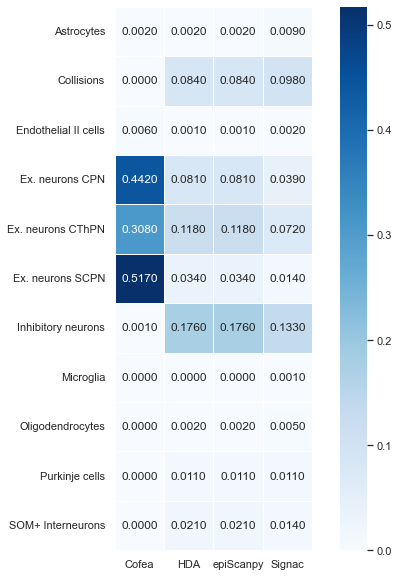

In [37]:
result = result.astype(float)
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(data=result, linewidths=0.5, annot=True, fmt=".4f", cmap='Blues', square=True,annot_kws={'size': 12})
# plt.savefig('result_final/enhancer/enhancer_Brain_3.pdf', dpi=500)
plt.show()

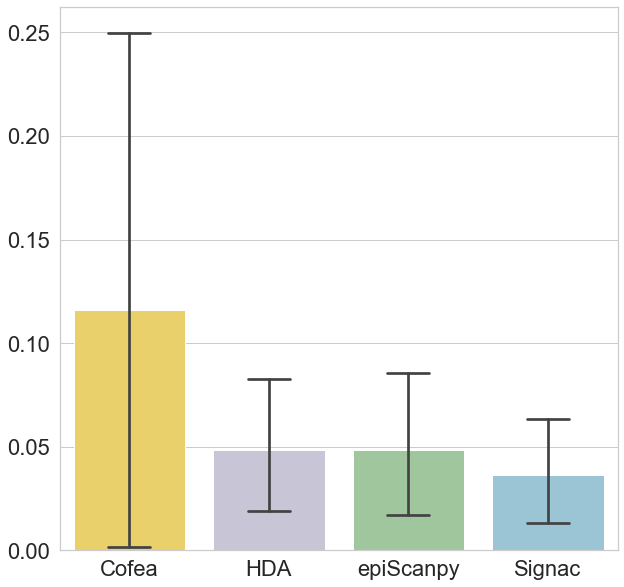

In [38]:
sns.set_theme(style='whitegrid',font_scale=2)
sns.barplot(data=result, palette=["#FFDD55","#C6C2DA","#9ACD97","#92C9DD"],capsize=.3)
# plt.savefig('/home/likeyi/program/method/result_final/enhancer/enhancer_epi_Brain_2.pdf', dpi=500)
plt.show()

In [23]:
index = list(np.unique(ATAC_temp.obs['label']))
enhencer_result = pd.DataFrame(columns=['Cofea','HDA','epiScanpy','Signac'], index=index)
for idx, filename in enumerate(os.listdir('../data/analysis/enhancer/')):
    print(idx, filename)
    data_enhancer = pd.read_csv('../data/analysis/enhancer/' + filename, sep='\t', comment='t', header=None)
    index = enhencer_result.index[idx]
    print(index)
    data_inter = pd.merge(data_choose_Cofea,data_enhancer,on=[0,1,2],validate="one_to_many")
    enhencer_result['Cofea'][index] = data_inter.shape[0] / data_choose_Cofea.shape[0]
    data_inter = pd.merge(data_choose_HDA,data_enhancer,on=[0,1,2],validate="one_to_many")
    enhencer_result['HDA'][index] = data_inter.shape[0] / data_choose_HDA.shape[0]
    data_inter = pd.merge(data_choose_epi,data_enhancer,on=[0,1,2],validate="one_to_many")
    enhencer_result['epiScanpy'][index] = data_inter.shape[0] / data_choose_epi.shape[0]
    data_inter = pd.merge(data_choose_sig,data_enhancer,on=[0,1,2],validate="one_to_many")
    enhencer_result['Signac'][index] = data_inter.shape[0] / data_choose_sig.shape[0]
enhencer_result

0 Brain_Purkinje_cells_enhancermm10frommm9.bed
Astrocytes
1 Brain_SOMp_Interneuron_enhancermm10frommm9.bed
Collisions
2 Brain_Ex_neur_SCPN_enhancermm10frommm9.bed
Endothelial II cells
3 Brain_Ex_neurons_CPN_enhancermm10frommm9.bed
Ex. neurons CPN
4 Brain_Astrocytes_enhancermm10frommm9.bed
Ex. neurons CThPN
5 Brain_Microglia_enhancermm10frommm9.bed
Ex. neurons SCPN
6 Brain_Collisions_enhancermm10frommm9.bed
Inhibitory neurons
7 Brain_Ex_neurons_CThPN_enhancermm10frommm9.bed
Microglia
8 Brain_inhib_neur_enhancermm10frommm9.bed
Oligodendrocytes
9 Brain_Oligodendrocyte_enhancermm10frommm9.bed
Purkinje cells
10 Brain_Endo_II_cell_enhancermm10frommm9.bed
SOM+ Interneurons


,Cofea,HDA,epiScanpy,Signac
Astrocytes,0.04,0.0822,0.0822,0.0812
Collisions,0.0922,0.085,0.085,0.0824
Endothelial II cells,0.2436,0.0852,0.0852,0.0824
Ex. neurons CPN,0.2434,0.0852,0.0852,0.0824
Ex. neurons CThPN,0.3742,0.0822,0.0822,0.082
Ex. neurons SCPN,0.025,0.0684,0.0684,0.0704
Inhibitory neurons,0.2412,0.0852,0.0852,0.0826
Microglia,0.2434,0.085,0.085,0.0822
Oligodendrocytes,0.196,0.085,0.085,0.0824
Purkinje cells,0.3602,0.0806,0.0806,0.0818


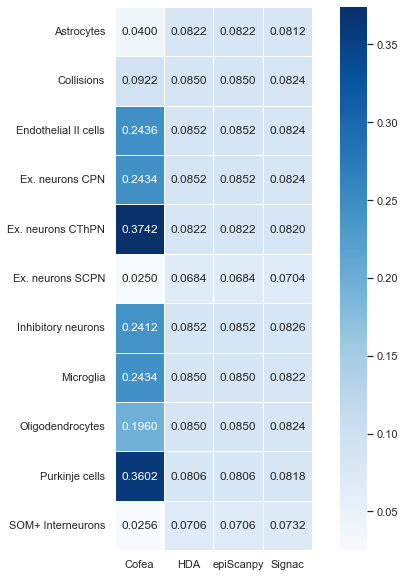

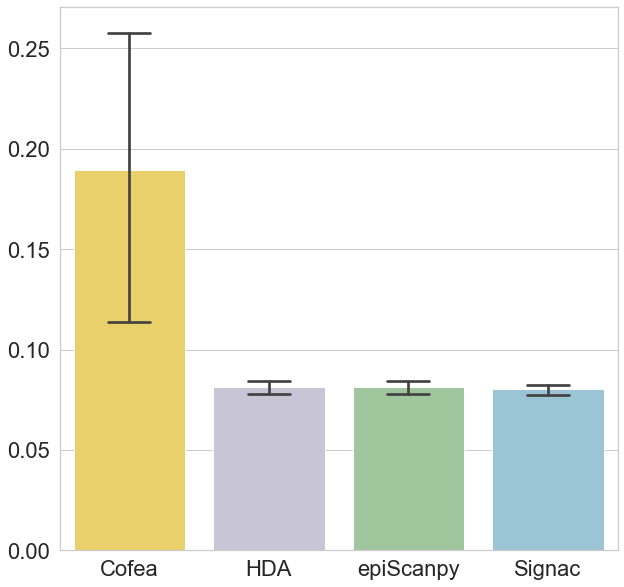

In [25]:
enhencer_result = enhencer_result.astype(float)
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(data=enhencer_result, linewidths=0.5, annot=True, fmt=".4f", cmap='Blues', square=True,annot_kws={'size': 12})
# plt.savefig('result_final/enhancer/enhancer_Brain_3.pdf', dpi=500)
plt.show()
sns.set_theme(style='whitegrid',font_scale=2)
sns.barplot(data=enhencer_result, palette=["#FFDD55","#C6C2DA","#9ACD97","#92C9DD"],capsize=.3)
plt.show()